In [1]:
from apiclient.discovery import build
from apiclient.errors import HttpError
from oauth2client.tools import argparser
import pafy
import csv
from importlib import reload
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import re
import sys
from textblob import TextBlob
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:

DEVELOPER_KEY = "YOUR API KEY"
YOUTUBE_API_SERVICE_NAME = "youtube"
YOUTUBE_API_VERSION = "v3"
# pafy.set_api_key("#AddYourAPIKey")
youtube = build(YOUTUBE_API_SERVICE_NAME, YOUTUBE_API_VERSION,developerKey=DEVELOPER_KEY)

In [45]:
videoId =(input("Enter video id "))
url = "https://www.youtube.com/watch?v=" + videoId
video = pafy.new(url)

Enter video id cjTXPujnBuk


In [46]:
def getcomments():
    results = youtube.commentThreads().list(
            part="snippet",
            maxResults=100,
            videoId=videoId,
            textFormat="plainText"
            ).execute()
    totalResults = 0
    totalResults = int(results["pageInfo"]["totalResults"])
    count = 0
    nextPageToken = ''
    comments = []
    further = True
    first = True
    while further:
        halt = False
        if first == False:
            try:
                results = youtube.commentThreads().list(
                part="snippet",
                maxResults=100,
                videoId=videoId,
                textFormat="plainText",
                pageToken=nextPageToken
                ).execute()
                totalResults = int(results["pageInfo"]["totalResults"])
            except e:
                print ("An HTTP error"+e.resp.status+" "+"occurred:\n" +e.content)
                halt = True
        if halt == False:
            count += totalResults
            for item in results["items"]:
                comment = item["snippet"]["topLevelComment"]
                text = comment["snippet"]["textDisplay"]
                comments.append(text)
            if totalResults < 100:
                further = False
                first = False
            else:
                further = True
                first = False
                try:
                    nextPageToken = results["nextPageToken"]
                except e:
                    print ("An KeyError error occurred: "+e)
                    further = False
    return comments 

In [47]:
def preprocessing(comment):
    a=[]
    stop_words = set(stopwords.words('english'))
    for c in comment:
        com=""
        b=re.sub('[^A-Za-z0-9 ]+', '', c)
        word_tokens = word_tokenize(b)
        for w in word_tokens: 
            if w not in stop_words: 
                com=com+" "+w.lower()
#         b=TextBlob(com).correct()
        a.append(com)
    return a

    

In [49]:
pos=[]
neg=[]
neutral=[]
for x in preprocessing(getcomments()):
    if TextBlob(x).sentiment[0] >=0.3:
        pos.append(x)
    elif TextBlob(x).sentiment[0] <=-0.3:
        neg.append(x)
    else:
        neutral.append(x)

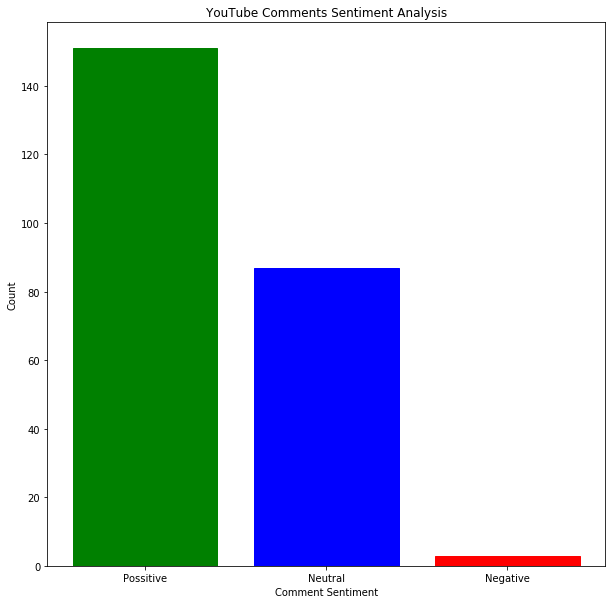

In [50]:
fig = plt.figure(figsize=(10,10))
bar=plt.bar(x = ["Possitive","Neutral","Negative"],height = [len(pos),len(neutral),len(neg)])
plt.title("YouTube Comments Sentiment Analysis")
plt.xlabel("Comment Sentiment")
plt.ylabel("Count")
bar[0].set_color('g')
bar[1].set_color('b')
bar[2].set_color('r')
plt.show()

In [51]:
for x in pos:
    print (x)
print("###########################################################################")
for x in neutral:
    print(x)
print("###########################################################################")
for x in neg:
    print(x)

 amazing really superb
 jitne bar sunta hu kuch alg sa mhsus hota h lovely voice
 its superb
 heart touching voice
 abhay dude always star music great work
 love song beautifully sung so romantic
 heart touching song
 beautiful
 shes good i heard lot version song i dont think anyone beats original queen ks chithra she good especially ragini part
 i feel like im smashed awesome u outstanding performance balance awesome awesome please keep singing update im bangladesh i love u guys
 superb
 song acha gaya hi ap dono ne kese expresstion k sath gaya use dkh kr acha lga love u gys
 awesome
 u amazingu nice voicekeep
 very beautifully sung
 both sang really awesome loved abay ji awesome
 nice
 nice song status mnnstatus
 awesome
 touching songjust
 nice song
 orignal voice nice
 love song
 amazing voice
 heart touching songs
 click link listen sing beautiful song duet using smule apphttpswwwyoutubecomwatchvlbekb594ahe
 abhay lovely voice somewhere hariharan flavour and girl lovely voice both